# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP18 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP18issues.json

In [1]:
import os

import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [2]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP18issues.json')]

In [3]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [4]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

,Author,State,closed_at,created_at,issue_number,labels
0,HSP18SCM50W,closed,2018-04-22,2018-04-20,475,"[Category:Inquiry, DetectionPhase:Field, Origi..."
1,HSP18SCM50W,closed,2018-04-22,2018-04-19,474,"[Address:59 W Grand Ave Chicago IL 60654, Cate..."
2,YSP18SCM40K,closed,2018-04-14,2018-04-14,472,"[Category:Inquiry, DetectionPhase:Field, Origi..."
3,RSP18SCM19N,closed,2018-04-14,2018-04-14,470,"[Category:Enhancement, DetectionPhase:Testing,..."
4,CSP18SCM32L,closed,2018-04-13,2018-04-13,466,"[Category:Inquiry, DetectionPhase:Field, Origi..."
5,RSP18SCM19N,closed,2018-04-13,2018-04-13,464,"[Address: 2400 N Lincoln Ave Chicago IL 60614,..."
6,MSP18SCM65B,closed,2018-04-13,2018-04-13,461,"[Category:Bug, DetectionPhase:Testing, Origina..."
7,JSP18SCM63J,closed,2018-04-13,2018-04-13,459,[]
8,YSP18SCM35Z,closed,2018-04-13,2018-04-13,454,"[Category:Enhancement, DetectionPhase:Testing,..."
9,YSP18SCM40K,closed,2018-04-13,2018-04-13,452,"[Address:225 S Canal St Chicago IL 60606, Cate..."


In [5]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [6]:
for i in range(0, len(wrangled_issues_df)):
    if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [7]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Address,Latitude,Longitude,Address,latitude,longitude,Lattitude,Latitude,Longitude
0,HSP18SCM50W,closed,2018-04-22,2018-04-20,475,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,inProgress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HSP18SCM50W,closed,2018-04-22,2018-04-19,474,"[Address:59 W Grand Ave Chicago IL 60654, Cate...",Requirements,Design,Bug,Medium,pendingReview,59 W Grand Ave Chicago IL 60654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YSP18SCM40K,closed,2018-04-14,2018-04-14,472,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,inProgress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RSP18SCM19N,closed,2018-04-14,2018-04-14,470,"[Category:Enhancement, DetectionPhase:Testing,...",Design,Testing,Enhancement,Major,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CSP18SCM32L,closed,2018-04-13,2018-04-13,466,"[Category:Inquiry, DetectionPhase:Field, Origi...",Coding,Field,Inquiry,High,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,RSP18SCM19N,closed,2018-04-13,2018-04-13,464,"[Address: 2400 N Lincoln Ave Chicago IL 60614,...",Requirements,NaN,Bug,NaN,NaN,2400 N Lincoln Ave Chicago IL 60614,41.925573,-87.649249,NaN,NaN,NaN,NaN,NaN,NaN
6,MSP18SCM65B,closed,2018-04-13,2018-04-13,461,"[Category:Bug, DetectionPhase:Testing, Origina...",Design,Testing,Bug,Critical,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,JSP18SCM63J,closed,2018-04-13,2018-04-13,459,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,YSP18SCM35Z,closed,2018-04-13,2018-04-13,454,"[Category:Enhancement, DetectionPhase:Testing,...",Requirements,Testing,Enhancement,Critical,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,YSP18SCM40K,closed,2018-04-13,2018-04-13,452,"[Address:225 S Canal St Chicago IL 60606, Cate...",Requirements,Design,Bug,Medium,Approved,225 S Canal St Chicago IL 60606,41.878693,-87.638924,NaN,NaN,NaN,NaN,NaN,NaN


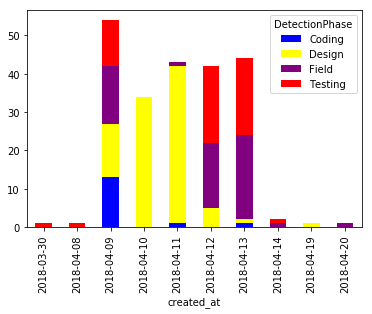

In [8]:
# Plot in Bar Chart the total number of issues created every day for every Detaction Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['created_at','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

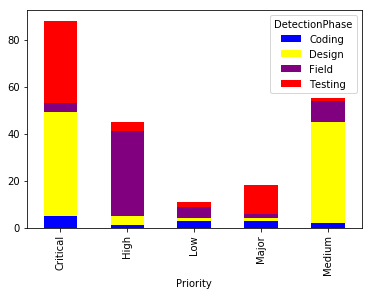

In [9]:
# Plot in Bar Chart the total number of issues created for every Phase based on thier priorites

LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority','DetectionPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green'], grid=False)

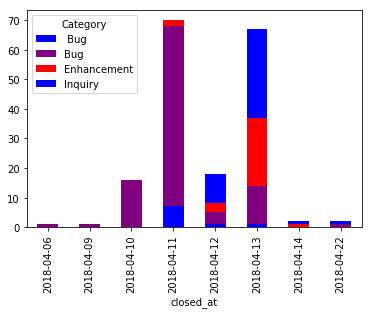

In [10]:
# Plot in Bar Chart the total number of issues closed every day for every Category

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','Category']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red'], grid=False)

#  Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase


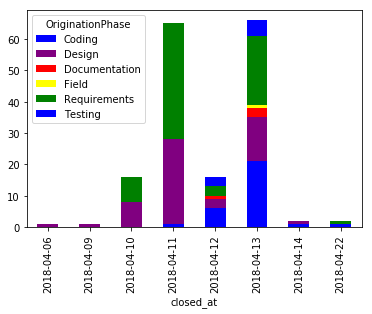

In [11]:
# Requirement #1: Add your code here
LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue', 'purple', 'red', 'yellow', 'green'], grid=False)



#  Requirement #2: # Plot in Bar Chart the total number of issues created for every Phase based on their Status



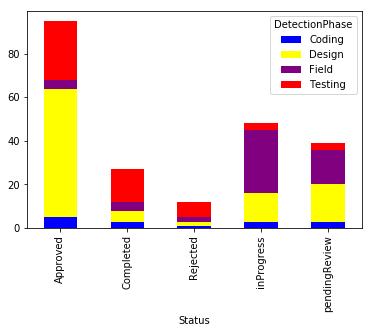

In [12]:
# Requirement #2: Add your code here
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red'], grid=False)
